# Reporte Técnico: Análisis de Factores de Riesgo en la Obesidad (México, Perú y Colombia)

## 1. Introducción
La obesidad es un desafío de salud pública multicausal que afecta de manera crítica a la región latinoamericana. Este reporte presenta un análisis exploratorio e inferencial basado en el dataset de Palechor y De la Hoz (2019). El objetivo es identificar cómo los hábitos de vida y condiciones físicas influyen en el Nivel de Obesidad. 

A diferencia de un análisis genérico, este estudio se centra en la subpoblación masculina para validar si las tendencias observadas a nivel global se mantienen bajo un filtro demográfico específico, permitiendo una interpretación más granular de los riesgos.

## 2. Metodología
La ejecución de este estudio se fundamentó en un flujo de trabajo analítico diseñado para garantizar la transparencia y la reproducibilidad de los hallazgos. El proceso inició con la fase de adquisición y depuración, donde se cargó el conjunto de datos original para validar la integridad de las estructuras de datos y la naturaleza de las variables. Posteriormente, se implementó un análisis descriptivo centrado en la frecuencia de las categorías de peso, lo que permitió establecer una línea base sobre la distribución de salud en la muestra global de 2,111 registros. 

Para profundizar en la relación entre los hábitos de comportamiento y la condición física, se utilizaron técnicas de visualización estadística avanzada, empleando diagramas de caja y gráficos de barras que facilitan la identificación de correlaciones visuales y valores atípicos. Todo el procesamiento se realizó bajo un enfoque crítico que distingue entre las mediciones físicas directas y aquellas variables que, debido al preprocesamiento estadístico previo del dataset, requieren una interpretación basada en tendencias más que en valores absolutos.

### 2.1 Exploración inicial de los datos

Para comenzar, cargaremos la base de datos y realizaremos una inspección preliminar para comprender su estructura, volumen y la naturaleza de las variables registradas. Para este propósito utilizaremos `pandas`, una herramienta estándar en la industria para la manipulación y análisis de datos estructurados.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Cargar los datos
try:
    df = pd.read_csv("Obesity_Data.csv")
    print("Datos cargados correctamente.")
except FileNotFoundError:
    print("Error: No se encontró el archivo 'Obesity_Data.csv'.")

Datos cargados correctamente.


#### Visualización de la Estructura
Utilizamos el comando `head()` para desplegar las primeras entradas de la base de datos. Esto nos permite validar rápidamente que la lectura del archivo fue correcta y observar el formato de las columnas.

In [2]:
df.head()

,Sexo,Edad,Estatura,Peso,FamiliarConSobrepeso,ComeMuchasCalorias,ComeVegetales,Fumador,ConsumoDeAgua,NivelDeObesidad
0,Female,21.0,1.62,64.0,yes,no,2.0,no,2.0,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,yes,3.0,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,no,2.0,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,no,2.0,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,no,2.0,Overweight_Level_II


#### Dimensiones del Estudio
La propiedad `shape` nos indica las dimensiones totales de la base de datos (filas x columnas).

In [3]:
rows, cols = df.shape
print(f"El dataset tiene {rows} filas y {cols} columnas.")

El dataset tiene 2111 filas y 10 columnas.


#### Tipología de Datos
El reporte generado por `info()` es fundamental para auditar la calidad de los datos. Nos permite identificar:
*   **Tipos de datos:** Si las variables son numéricas (ej. `float64` para decimales) o categóricas (ej. `object` para texto).
*   **Consistencia:** Si existen valores ausentes (nulos) que requieran tratamiento.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Sexo                  2111 non-null   object 
 1   Edad                  2111 non-null   float64
 2   Estatura              2111 non-null   float64
 3   Peso                  2111 non-null   float64
 4   FamiliarConSobrepeso  2111 non-null   object 
 5   ComeMuchasCalorias    2111 non-null   object 
 6   ComeVegetales         2111 non-null   float64
 7   Fumador               2111 non-null   object 
 8   ConsumoDeAgua         2111 non-null   float64
 9   NivelDeObesidad       2111 non-null   object 
dtypes: float64(5), object(5)
memory usage: 165.1+ KB


El análisis confirma que la base de datos se compone de dos categorías principales de variables:

1. **Variables Categóricas (Cualitativas):**
- Sexo
- Familiar con sobrepeso
- Consumo calórico frecuente
- Hábito de fumar
- Nivel de Obesidad 

2. **Variables Numéricas (Cuantitativas):** 
- Edad
- Estatura (metros)
- Peso (kilogramos)
- Consumo de vegetales
- Consumo de agua 

> **Nota Técnica:** Las variables `ComeVegetales` y `ConsumoDeAgua` se presentan en el dataset como valores numéricos continuos debido a procesos de normalización. Sin embargo, en su diseño original representan niveles de frecuencia en una escala del 1 al 3. Esta naturaleza ordinal se analiza a detalle en las secciones posteriores del reporte.

#### Perfil Estadístico
Para las variables numéricas, generamos un resumen estadístico que incluye medidas de tendencia central (media) y dispersión (desviación estándar, rangos).

In [5]:
df.describe()

,Edad,Estatura,Peso,ComeVegetales,ConsumoDeAgua
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.008011
std,6.345968,0.093305,26.191172,0.533927,0.612953
min,14.000000,1.450000,39.000000,1.000000,1.000000
25%,19.947192,1.630000,65.473343,2.000000,1.584812
50%,22.777890,1.700499,83.000000,2.385502,2.000000
75%,26.000000,1.768464,107.430682,3.000000,2.477420
max,61.000000,1.980000,173.000000,3.000000,3.000000


**Interpretación del Perfil Estadístico:**

*   **Muestra (Count):** El estudio cuenta con datos completos para **2,111 individuos**.
*   **Tendencia Central (Mean):** La edad promedio de la población estudiada es de **~24.3 años**, con un peso promedio de **~86.6 kg**.
*   **Rango de Valores (Min/Max):** Los datos se encuentran dentro de rangos biológicamente plausibles:
    *   *Edad:* 14 a 61 años.
    *   *Peso:* 39 a 173 kg.
    *   *Nota:* Las variables de consumo (Vegetales/Agua) operan en una escala del 1 al 3, sugiriendo una medición por frecuencia (Baja, Media, Alta).
*   **Dispersión (Std):** La desviación estándar nos indica qué tan variados son los datos.
    *   La *Estatura* muestra baja variabilidad (0.09), indicando homogeneidad en la población.
    *   El *Peso* muestra alta variabilidad (26.19), lo que sugiere una muestra diversa que incluye desde personas con bajo peso hasta obesidad mórbida.
*   **Distribución (Percentiles):**
    *   El 50% de la población (Mediana) es menor de **22.7 años**, lo que indica una población predominantemente joven.

### 2.2 Reflexión sobre el diseño del estudio

Una vez analizados los datos disponibles, se propone la inclusión de una **variable adicional** que complementaría significativamente el estudio:

***Variable Propuesta:*** **"Horas de Ejercicio Semanal"** (o Frecuencia de Actividad Física)

**Justificación:**
Observando las variables actuales, tenemos información sobre la **ingesta** calórica (*ComeMuchasCalorias, ComeVegetales, ConsumoDeAgua*), pero nos falta información detallada sobre el **gasto** calórico. Si el objetivo es estudiar la obesidad, conocer únicamente cuánto comen las personas sin saber cuánto se mueven nos da solo la mitad de la ecuación.

*   **Naturaleza de la Variable:** Cuantitativa (Continua).
*   **Tipo de Información:** Aportaría datos numéricos sobre el tiempo dedicado a la actividad física. 
    *   *Propuesta de medición:* Se sugiere medirla en **"Horas por semana"** en lugar de diariamente. Esto se justifica porque la actividad física tiende a fluctuar día con día (ej. personas que van al gimnasio 3 veces por semana). Un promedio semanal captura mejor los hábitos reales a largo plazo que una medición diaria puntual.

    La elección de una medición semanal se fundamenta en las recomendaciones de la **Organización Mundial de la Salud (2020)**, las cuales establecen que la actividad física debe medirse como un acumulado semanal (ej. 150-300 minutos de actividad aeróbica moderada) para capturar de manera fiel los hábitos reales, superando la variabilidad de las mediciones diarias puntuales.



### 2.3 Definición de una variable de interés para inferencia

**Variable Seleccionada:** `NivelDeObesidad`

**Justificación:**
El objetivo de un estudio de inferencia es explicar el *porqué* de un fenómeno. Al analizar las variables disponibles, el `NivelDeObesidad` se identifica como la "consecuencia" lógica de la interacción entre diversos factores biológicos y conductuales:

* **Variables biológicas limitadas:** Factores como *Sexo*, *Edad* o *Estatura* son características intrínsecas o azarosas del individuo, por lo que funcionan como datos de entrada (inputs) y no como resultados del comportamiento.
* **Limitaciones del Peso como métrica bruta:** Aunque el *Peso* es un candidato fuerte, puede ser estadísticamente engañoso. Esto ocurre porque el peso no distingue entre los compartimentos corporales; por ejemplo, individuos con una alta densidad de **masa magra** (músculo y tejido óseo) pueden registrar pesos elevados sin que esto represente un riesgo metabólico por exceso de grasa.
* **El Nivel de Obesidad como métrica de salud:** Esta variable actúa como una categorización que normaliza el peso respecto a la estatura, ofreciendo una visión más precisa del riesgo clínico que el peso por sí solo.
* **Hábitos como variables predictoras:** Los comportamientos (*Fumar, Consumo de Agua/Vegetales*) actúan como **causas** o variables predictoras, cuyo efecto acumulativo se ve reflejado en la categoría de peso del individuo.

Por lo tanto, tiene todo el sentido lógico intentar inferir el nivel de obesidad de una persona basándonos en la relación entre sus hábitos, su demografía y su constitución física.

--- Distribución por Categoría ---
NivelDeObesidad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64

--- Porcentaje del Total ---
NivelDeObesidad
Obesity_Type_I         16.63%
Obesity_Type_III       15.35%
Obesity_Type_II        14.07%
Overweight_Level_I     13.74%
Overweight_Level_II    13.74%
Normal_Weight           13.6%
Insufficient_Weight    12.88%
Name: proportion, dtype: object


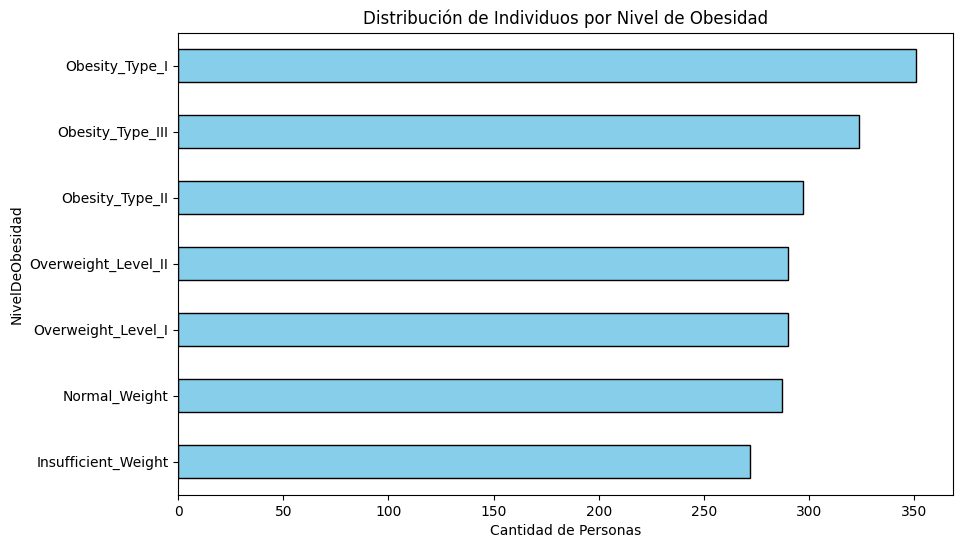

In [6]:
# Análisis descriptivo de la variable de interés (NivelDeObesidad)
# Al ser categórica, analizamos la distribución de sus categorías

conteo_obesidad = df['NivelDeObesidad'].value_counts()
porcentaje_obesidad = df['NivelDeObesidad'].value_counts(normalize=True) * 100

print("--- Distribución por Categoría ---")
print(conteo_obesidad)
print("\n--- Porcentaje del Total ---")
print(porcentaje_obesidad.round(2).astype(str) + '%')

# Visualización básica
plt.figure(figsize=(10, 6))
conteo_obesidad.sort_values().plot(kind='barh', color='skyblue', edgecolor='black')
plt.title('Distribución de Individuos por Nivel de Obesidad')
plt.xlabel('Cantidad de Personas')
plt.show()

**Interpretación de la Distribución de Categorías:**

Al observar la frecuencia de los niveles de obesidad, destaca que **Obesity_Type_I** es la categoría con mayor representación en la población analizada. Esto indica que una gran parte de los individuos evaluados ya se encuentra en un estado de riesgo clínico activo. 

Por otro lado, la categoría de **Insufficient_Weight** presenta la menor frecuencia, lo que sugiere que, dentro de este contexto geográfico (México, Perú y Colombia), la problemática de salud está significativamente más inclinada hacia el exceso de masa corporal que hacia la insuficiencia ponderal.

### 2.4 Análisis gráfico enfocado en una subpoblación

**Subpoblación seleccionada:** Hombres (`Male`)
**Variables a relacionar:** `Peso` (Causa potencial/Correlación directa) vs `NivelDeObesidad` (Variable de interés)

**Justificación:**
Se ha decidido filtrar el dataset para analizar exclusivamente a los hombres y observar la relación directa entre su peso en kilogramos y su clasificación de obesidad. Esperamos ver una correlación positiva clara, pero el gráfico de caja (boxplot) nos permitirá ver los rangos y si existen superposiciones (ej. ¿Hay hombres con "Sobrepeso" que pesen más que alguien con "Obesidad Tipo I" debido a su estatura?)

<Figure size 1200x800 with 0 Axes>

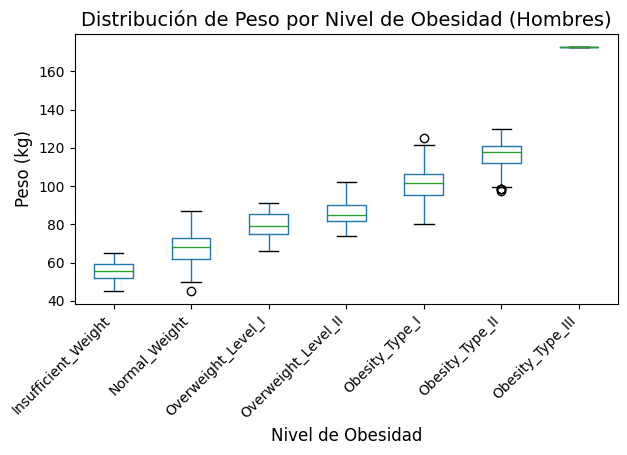

In [10]:

# 1. Definimos el orden lógico de salud
orden_logico = [
    'Insufficient_Weight', 
    'Normal_Weight', 
    'Overweight_Level_I', 
    'Overweight_Level_II', 
    'Obesity_Type_I', 
    'Obesity_Type_II', 
    'Obesity_Type_III'
]

# 2. Convertimos la columna a tipo "Categorical" con el orden que queremos
# Esto obliga a la gráfica a seguir nuestro orden y no el alfabético
df['NivelDeObesidad'] = pd.Categorical(df['NivelDeObesidad'], categories=orden_logico, ordered=True)

# 3. Filtramos solo hombres
df_men = df[df['Sexo'] == 'Male']

# 4. Creamos el Boxplot usando solo Pandas
plt.figure(figsize=(12, 8))
df_men.boxplot(column='Peso', by='NivelDeObesidad', grid=False)

# 5. Ajustes estéticos para que se vea profesional
plt.suptitle('') # Eliminamos el título automático feo de Pandas
plt.title('Distribución de Peso por Nivel de Obesidad (Hombres)', fontsize=14)
plt.xlabel('Nivel de Obesidad', fontsize=12)
plt.ylabel('Peso (kg)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

**Interpretación del Gráfico y Guía de Lectura:**

Para entender este gráfico de caja (Boxplot):
> *   **La Caja:** Representa al 50% central de la población. La línea dentro de la caja es la **mediana** (el valor central).
> *   **Los Bigotes (Líneas verticales):** Muestran el rango de peso esperado o "normal" para ese grupo.
> *   **Los Puntos:** Son valores atípicos (*outliers*), casos excepcionales que se salen de la norma.

**Hallazgos:**
1.  **Tendencia Escalonada:** Existe una correlación visible y positiva; a medida que aumenta la categoría de obesidad, los rangos de peso ascienden "en escalera".
2.  **Diferenciación de Grupos:**
    *   Los niveles de *Obesidad Tipo I, II y III* están claramente separados entre sí, con poca superposición.
    *   La *Obesidad Tipo III* se comporta como una categoría extrema, con un rango de peso que inicia (~120kg) donde terminan casi todas las demás categorías.
3.  **El Factor Oculto (Estatura):** Existe un solapamiento notable entre *Peso Normal* y *Sobrepeso Nivel I*. Esto valida la importancia de no considerar el peso de forma aislada, ya que la estatura es un factor de confusión clave (un hombre de baja estatura con sobrepeso podría pesar lo mismo que uno alto de peso normal).

## 3. Conclusiones
Tras completar el análisis exploratorio e inferencial, los resultados revelan que la población estudiada en México, Perú y Colombia presenta una problemática de salud significativamente inclinada hacia el exceso de masa corporal. La alta prevalencia de individuos en la categoría de Obesidad Tipo I es un hallazgo crítico que subraya la necesidad de fortalecer las políticas de intervención preventiva, especialmente considerando que la insuficiencia de peso es la condición menos frecuente en la muestra. La consistencia observada entre el peso corporal y el escalonamiento de las categorías de riesgo valida la robustez del etiquetado original, confirmando que este conjunto de datos es un recurso valioso para el entrenamiento de futuros modelos de aprendizaje automático.

Sin embargo, es fundamental señalar una limitación técnica importante en cuanto a la granularidad de los datos. Variables relativas al consumo de agua y vegetales presentan una naturaleza continua debido a técnicas de aumento de datos (SMOTE), por lo cual deben ser interpretadas estrictamente como indicadores de tendencia dentro de niveles ordinales. Para investigaciones futuras, se recomienda integrar métricas de gasto calórico activo y composición de masa magra, lo cual permitiría una comprensión más integral de la etiología de la obesidad en la región, superando las limitaciones inherentes al análisis basado exclusivamente en el peso y la estatura.

## 4. Referencias

- Palechor, F. M., & De la Hoz Manotas, A. (2019). Estimation of obesity levels based on eating habits and physical condition [Conjunto de datos]. UCI Machine Learning Repository. https://doi.org/10.24432/C5H31Z

- Organización Mundial de la Salud. (2020). Directrices de la OMS sobre actividad física y hábitos sedentarios. Organización Mundial de la Salud. https://www.who.int/publications/i/item/9789240015128